# **Deliverable 1: Radiation Physics and Image Quality**

---

## Overview

This deliverable covers foundational and advanced concepts from **Weeks 2-5** (Lectures 1-12) of the course. You will explore:
1. Radiation physics and ionizing radiation
2. X-ray production and energy scales
3. Photon-matter interactions (photoelectric, Compton, attenuation)
4. Spatial resolution and system blurring
5. Linear systems, MTF, and image sharpness
6. Noise sources, SNR, and image quality
7. Quantum noise, dose optimization, and trade-offs
8. Comprehensive design challenge for imaging protocols

You will engage with the material through a combination of conceptual questions and guided coding exercises designed to strengthen physical intuition and practical problem-solving skills. By the end of this deliverable, you will be able to interpret imaging trade-offs, analyze image quality metrics, and make informed decisions when optimizing imaging protocols for clinical applications.

---
## **<u>Part 1: Radiation Physics</u>**

### 1.1 Ionizing Radiation Classification and Energy Scales

**Key Concept:**
Radiation is classified by whether it has enough energy to knock electrons out of atoms (ionization). This happens when the photon energy exceeds the **ionization potential** of an atom (~13.6 eV for hydrogen).

**Energy Classification:**
- **Non-ionizing:** Visible light (1.6-3.1 eV), radio waves (<0.00001 eV)
  - Energy too low to ionize atoms
  - Cannot damage DNA directly
  
- **Ionizing:** X-rays (keV range), gamma rays (keV-MeV range)
  - High enough energy to remove electrons from atoms
  - Can damage living tissue and DNA
  - Used in medical imaging (controlled exposure)

**Key Equation:**
$$E = h\nu = \frac{hc}{\lambda}$$

- Where:
    - h = 6.626×10⁻³⁴ J·s (Planck's constant)
    - c = 3×10⁸ m/s (speed of light)

### **Question 1**

**Scenario:** A patient asks why a chest X-ray is "safe" but they worry about radiation exposure.

Using the concepts above, answer:
- (a) Why is a chest X-ray classified as ionizing radiation? What does "ionizing" mean?

- (b) A chest X-ray delivers ~0.1 mSv. A CT scan delivers ~7 mSv (70× higher). What does this mean for radiation dose to the patient?

In [ ]:
# a) ionizing (in x-rays) refers to the process in which an ion pair is created from the removal of an electron from an atom during electromagnetic radiation.
# ionization occurs when the charged electron does not have enough energy to pass through the target material and it therefore deposits giving us contrast.
# b) this means that the radiation dose to the patient is 70x higher in a CT scan than in an x-ray
#     - meaning that the CT comparatively has a higher biological risk associated with it for the patient.

### 1.2 X-ray Production

**X-ray Generation:**
X-rays are produced when high-energy electrons strike a metal target (usually tungsten).

**Two Production Mechanisms:**

1. **Bremsstrahlung (Braking Radiation):**
   - Electron decelerates near nucleus
   - Loses kinetic energy → emitted as X-ray photon
   - Produces **continuous spectrum** of energies
   - Maximum energy = tube voltage (kVp)
   - Accounts for ~80% of X-ray output

2. **Characteristic X-rays:**
   - Electron knocks out inner shell electron
   - Outer electron fills vacancy
   - Energy difference emitted as X-ray
   - Produces **discrete spectral lines** (specific energies)
   - Depends on target material (e.g., K-alpha, K-beta lines for tungsten)

**X-ray Spectrum:**
- Shape determined by tube voltage (kVp) and filtration
- Higher kVp → higher maximum energy and intensity
- Filtration removes low-energy photons (patient protection)

**Key Equation:**
$$E_{max} = eV_{peak}$$
- Where:
   - $V_{peak}$ is the peak tube voltage in kV

### **Question 2**

An X-ray tube operates at 100 kVp with a tungsten target.

- a) What is the maximum energy (in keV) of X-ray photons that can be produced?

- b) Explain the difference between bremsstrahlung and characteristic X-rays. Which one produces the continuous spectrum and which produces discrete peaks?

- c) Why do we use filtration (typically aluminum) at the X-ray tube output? What effect does this have on the X-ray spectrum and patient dose?

In [ ]:
# a)
Vpeak = 100 kVp
e = None # elementary charge - not directly used here for Emax calculation, so set to None or remove
Emax = Vpeak
print(f"The maximum energy of X-ray photons that can be produced is {Emax} keV.")

The maximum energy of X-ray photons that can be produced is 100 keV.


In [ ]:
# b)
# bremsstrahlung produces the continuous spectrum and characteristic xrays produce discrete peaks.
# In bremsstrahlung the fast electron will enter and pass near the atomic nucleus wherein Coloumb reactions will then deflect it
# resulting in deceleration of the electron, losing kinetic energy and the subsequent emission of electromagnetic radiation
# = continuous spectrum as we dont really know what the electron values will be
# Characteristic xrays however are produced through energy shell transitions - meaning shell vacancies are created and then filled via the cascade process
# this process is dependent on the specific binding energies of each element therefore characteristic xrays are element specific
# which allows us to better predict and interpret the respective binding energies per shell = why we see discrete peaks = visual representation of the cascade.

In [ ]:
# c)
# we use filtration at the tube output to limit the amount of electrons that are able to pass through
# as a means to protect the patient from unnecessary ionization deposit = lower biological risk.
# in terms of effect on the xray spectrum, beam intensity will vary depending on the thickness of the filter
# thicker filtration means that the xray beam itself would need to 'harden'
# which means the mean photon energy increases while maximum energy remains the same
# this then improves beam quality at the caveat of reduced beam intensity


---

## **<u>Part 2: Photon Interactions</u>**

### 2.1 Interaction Types

**Key Concept:**
When X-rays pass through tissue, they interact through different mechanisms depending on photon energy and material properties.

**Main Interaction Types:**

1. **Photoelectric Effect** (low energy, high-Z materials)
   - X-ray photon absorbed completely
   - Electron kicked out of atom
   - Useful for imaging (produces signal)
   - Why: Bone (high Z) appears bright

2. **Compton Scattering** (medium-high energy)
   - Photon deflected and loses energy
   - Electron recoils
   - Scattered photons reduce image contrast (noise)
   - Why: Anti-scatter grids are used

Refer to the schematic below:

<p align="center">
  <img src="https://github.com/julianamassaro/BMEN509-623_Deliverable_1/blob/main/figures/scatter_effect_example.jpg?raw=1" width="600">
</p>

This illustrates how Compton-scattered photons reach the detector and reduce image contrast, and how anti-scatter grids selectively absorb these scattered photons while allowing primary radiation to pass.

3. **Pair Production** (very high energy, >1.02 MeV)
   - Rare in medical imaging
   - Not important for X-rays (typically 20-150 keV)

**Attenuation:**
X-rays passing through material follow the **Beer-Lambert Law**:
$$I = I_0 e^{-\mu x}$$

- where:
    - $I$ = transmitted intensity
    - $I_0$ = incident intensity
    - $\mu$ = linear attenuation coefficient (material dependent)
    - $x$ = material thickness

### **Question 3**

Consider an X-ray imaging system operating at 80 keV.

- a) At this energy, both photoelectric absorption and Compton scattering occur. Which interaction mechanism is more likely to dominate in bone tissue versus soft tissue, and why? (Hint: Consider the atomic number dependence)

- b)Explain why Compton scattered photons are problematic for image quality. What specific image quality metric do they degrade?

- c) X-ray imaging systems use anti-scatter grids to reduce the detection of scattered photons. If a grid removes 80% of scattered photons but also blocks 20% of primary (unscattered) photons, when would you choose to use the grid versus imaging without it? Consider both image quality and patient dose.

- d) In CT imaging, we use higher energies (120-140 keV) compared to conventional radiography (60-80 keV). Based on the energy dependence of photoelectric and Compton interactions, how does this affect the contrast between bone and soft tissue in CT images?

In [ ]:
# a)
# for bone tissue, photoelectric absorption would dominate, this is because it is dependent on atomic number or the Z value.
# because bone is primarily made up of calcium its Z value has a higher effectiveness compared to soft tissue which is mostly carbon, nitrogen, hydrogen
# and oxygen. likewise for soft tissue, compton scattering will be able to dominate more because it involves a partial energy transfer
# and is therefore more dependant on the electron density rather than the atomic number.

In [ ]:
# b)
# compton scatter is problematic because the electrons are hitting the detector from incorrect directions
# - this adds unwanted background noise that is not representative of the true anatomy.
# this would specifically degrade image contrast and contrast to noise ratio as a result
# reducing the detectability to distinguish low contrast features especially in tissues of similar density.

In [ ]:
# c)
# I would choose to use the grid when contrast is critical as their primary job is to absorb scatter before they hit the detector
# ensuring only inline beams are reaching the detector plate. by removing this scatter before it makes it to the detector, contrast is improved
# as well as the ability to detect low contrast lesions which would have not been possible had the grid not been there.
# on the flip side though, because the grid is blocking some primary photons you may find you need to increase the dose when utilizing it
# to maximize your SPR, therefore when the aim is to minimize the dose or the conditions you are scanning in provides an already low chance
# for scatter to occur then you wouldn't want to use the grid as the trade off for using it would be inappropriate in such cases.

In [ ]:
# d)
# the use of higher keV values in CT shifts the likelihood of interactions toward compton dominance rather than photoelectric
# - reducing its effect of strong Z-dependant contrast
# because of this, the intrinsic difference in contrast between tissue and bone would therefore be reduced at higher keV techniques.
# To compensate for this, CT maintains the ability to discern between bone and soft tissue through the ability for the operator
# to uitilize windowing techniques on the scan to manually adjust the contrast of the image

### 2.2 Beer-Lambert Law & Attenuation

**Attenuation** describes how X-ray intensity decreases as it passes through material.

**Beer-Lambert Law:**
$$I = I_0 e^{-\mu x}$$

- Where:
    - $I$ = transmitted intensity
    - $I_0$ = incident intensity  
    - $\mu$ = linear attenuation coefficient (cm⁻¹) - material dependent
    - $x$ = material thickness (cm)

**Half-Value Layer (HVL):**
- Thickness of material that reduces intensity to 50%
- Related to attenuation coefficient: $HVL = \frac{\ln(2)}{\mu} = \frac{0.693}{\mu}$
- Lower HVL = more attenuation (denser material or lower energy)

**Key Insight:**
- Bone has higher μ than soft tissue → more attenuation → appears bright
- Different energies attenuate differently (energy dependence)
- HVL is a practical measure used in X-ray quality control

### **Question 4**

A 60 keV X-ray beam passes through soft tissue with linear attenuation coefficient μ = 0.2 cm⁻¹.

- a) If the incident intensity is $I_0 = 10,000$ photons, what is the transmitted intensity after passing through 5 cm of tissue? Use the Beer-Lambert law.

- b) Calculate the Half-Value Layer (HVL) for this tissue at 60 keV.

- c) If you increase the X-ray energy from 60 keV to 120 keV, the attenuation coefficient decreases to μ = 0.15 cm⁻¹. What happens to the transmitted intensity through the same 5 cm of tissue? Calculate the new transmitted intensity and explain why higher energy X-rays penetrate better.

In [ ]:
# a)
import numpy as np

I0 = 10000    # initial photons
mu = 0.2      # attenuation coefficient
x = 5         # density of tissue in cm

I = I0 * np.exp(-mu * x)
print("Transmitted intensity I =", I)

Transmitted intensity I = 3678.7944117144234


In [ ]:
# b)
mu = 0.2    # attenuation coefficient
HVL = 0.693 / mu
print("Half-Value Layer (HVL) =", HVL, "HVLs")

Half-Value Layer (HVL) = 3.4649999999999994 HVLs


In [ ]:
# c)
I0 = 10000       # initial photons
mu_new = 0.15    # decreased attenuation coefficient
x = 5            # density of tissue in cm

I_new = I0 * np.exp(-mu_new * x)
print("New transmitted intensity I =", I_new)

New transmitted intensity I = 4723.665527410147


In [ ]:
# c)
# higher energy levels are able to better penetrate tissue because as photon energy increases attenuation decreases
# which means that fewer photons are removed or "stopped" from the beam while passing through the same material thickness as a lower energy xray.

---

## **<u>Part 3: Spatial Resolution</u>**

### 3.1 Point Spread Function (PSF) and System Blurring

**Key Concept:**

Real imaging systems are **imperfect**. A point source (infinitely small object) doesn't appear as a point in the image—it appears as a **blurred blob**. This blurring limits how small an object you can see.

**Point Spread Function (PSF):**
- **PSF** = How much a point source gets blurred by the imaging system
- **Shape:** Usually Gaussian-like (bell curve)
- **Width:** Characterized by **FWHM** (Full Width at Half Maximum)
  - Smaller FWHM = sharper system (better resolution)
  - Larger FWHM = blurrier system (worse resolution)


**Resolution Rule of Thumb:** You can distinguish two objects only if they're separated by at least the **FWHM of the PSF**. Anything closer just blurs together.

**Image Formation:**

$$\text{Blurred Image} = \text{Sharp Object} \otimes \text{PSF}$$

  - The $\otimes$ symbol means "convolved with"—every sharp point gets replaced by a blurred copy (PSF shape).

**Real Example - Chest X-ray:**
- System resolution: ~0.2 mm FWHM
- Lung nodule: 3-4 mm → **Visible** (15-20× larger than PSF)
- Micro-calcification: 1-3 mm → **Borderline** (5-15× larger)
- Small vessel: 0.5 mm → **Invisible** (blurs away)

### **Question 5**

You're designing an X-ray detector system for mammography, where high resolution is critical to detect small microcalcifications (~100 μm).

- a) If your current detector has a PSF with FWHM = 200 μm, can you reliably detect 100 μm objects? Explain your reasoning using the relationship between FWHM and object size.

- b) You have two detector options:
   - **Detector A**: 50 μm pixels, FWHM = 100 μm, readout time = 5 seconds
   - **Detector B**: 100 μm pixels, FWHM = 200 μm, readout time = 1 second
   
   Which detector would you choose for mammography and why? Consider resolution requirements, patient motion, and clinical workflow.

- c) In PET imaging, using smaller detector crystals improves spatial resolution but also increases system cost and complexity. If you could reduce FWHM from 5 mm to 2.5 mm (2× improvement) at a 3× increase in cost, what clinical applications would justify this investment? Name at least two specific imaging tasks where the improved resolution would significantly impact diagnosis.

In [ ]:
# a)
# you cannot reliably detect 100μm objects with a PSF value of 200μm because the blur of the system would be larger than the size of the feature.
# objects that are significantly smaller than the FWHM will lead to an indistinguishability between the object and noise
# because the significant difference between the FWHM and object size greatly reduces contrast.

In [ ]:
# b)
# for a mammogram I would lean toward choosing detector A, this is because the pixel and FWHM values will provide greater spatial resolution
# which you would want especially in dense tissue like breast tissue where abnormalities or calcification may be missed with lower spatial resolution.
# while it does have a longer readout time, mammography scanners are specifically designed to limit patient motion and provide ideal positioning
# - in this case the trade off of longer readout time would be a favourable sacrifice if it meant a better diagnostic capability
# to catch any small abnormalities in the tissue that might've been missed.

In [ ]:
# c)
# improved PET resolution would significantly impact diagnostic ability in IBD as it would help clinicians attain better localization of
# active inflammation sites and differentiate between areas of active flare activity versus the surrounding physiological uptake -
# helping clarify if this uptake represents true pathology and therefore clinicians can make more informed diagnoses.
# it would also help in the diagnosis of epilepsy as clinicians would be able to more accurately locate the area of the brain responsible
# for seizure activity. if resolution was reduced, images would appear blurred causing abnormal uptake to spread into other regions of the brain
# making it difficult to discern where the focus area of the seizure is. the higher spatial resolution would then allow for a reduction in
#this blurring and aid clinicians' confidence that the identified region is truly responsible for the cause of the epileptic activity.

### 3.2 Linear Systems Theory & MTF

**Linear Systems Theory:**
Medical imaging systems can be modeled as linear, shift-invariant systems.

**Key Properties:**
1. **Linearity:** If input doubles, output doubles
2. **Shift Invariance:** System response doesn't depend on position
3. **Convolution:** Image formation is described by convolution with PSF
   $$\text{Image} = \text{Object} \otimes \text{PSF}$$

**Modulation Transfer Function (MTF):**
- MTF is the **Fourier transform of the PSF**
- Measures how well the system reproduces different spatial frequencies
- MTF ranges from 0 (no reproduction) to 1 (perfect reproduction)
- **Spatial frequency** measured in cycles/mm or line pairs/mm

**Interpreting MTF:**
- MTF = 1.0 at low frequencies → large objects reproduced perfectly
- MTF decreases at high frequencies → fine details are blurred
- **MTF at 50%** (where MTF = 0.5) is often used as resolution metric
- Related to FWHM: Better resolution → higher MTF at high frequencies

**Example:**
- System A: MTF = 0.5 at 5 cycles/mm → can resolve 0.1 mm details
- System B: MTF = 0.5 at 10 cycles/mm → better, can resolve 0.05 mm details

### **Question 6**

You are comparing two X-ray detector systems:

| System | MTF at 2 cycles/mm | MTF at 5 cycles/mm | MTF at 10 cycles/mm |
|--------|-------------------|-------------------|---------------------|
| System A | 0.95 | 0.70 | 0.30 |
| System B | 0.90 | 0.50 | 0.10 |

- a) Which system has better spatial resolution? Explain your reasoning using the MTF values.

- b) For detecting a 1 mm lesion (which contains frequencies around 1-2 cycles/mm), which system would be more suitable?

- c) Explain the relationship between MTF and PSF. How are they related mathematically, and what does each tell us about the imaging system?


In [ ]:
# a)
# system A has better spatial resolution because it has a better ability to retain higher MTF values at higher frequencies,
# this is especially seen at the 5 and 10 cycles/mm measurements indicating a better ability to preserve fine detail compared to system B.

In [ ]:
# b)
# for a 1mm lesion system A would be slightly more suitable because it has a higher MTF value at 2 cycle/mm compared to B,
# meaning it would be able to preserve lesion contrast more effectively in the specified frequencies.

In [ ]:
# c)
# mathematically the two values are related because the MTF represents the magnitude of the Fourier transform of the PSF.
# the PSF tells us how a point is blurred in the image domain and in order to know how this blur affects spatial effects
# we use Fourier transform to get to the frequency domain wherein MTF is used to discern the systems ability to transfer
# these different spatial frequencies (detail)

---

## **<u>Part 4: Noise & Image Quality</u>**

### 4.1 Understanding Image Noise

**Quantum (Poisson) Noise** is the primary noise source in X-ray and nuclear imaging:

- Arises from the random nature of photon emission and detection
- Follows **Poisson statistics**: if we detect N photons on average, the noise (standard deviation) is $\sigma = \sqrt{N}$
- **Signal-to-Noise Ratio (SNR)**: $SNR = \frac{N}{\sigma} = \frac{N}{\sqrt{N}} = \sqrt{N}$

**Key insights:**
- SNR increases with the square root of photon count
- To double SNR, you need 4× more photons (4× more dose)
- **Rose Criterion**: Objects are detectable when SNR ≥ 5

**Noise reduction strategies:**
1. Increase photon count (higher dose)
2. Spatial averaging (smoothing filters)
3. Temporal averaging (multiple acquisitions)

Below is an example of a noisy MRI image:

<p align="center">
  <img src="https://github.com/julianamassaro/BMEN509-623_Deliverable_1/blob/main/figures/MRI_Highnoise.jpg?raw=1" width="400">
</p>

### **Coding Exercise 1**

In this exercise, you will implement and compare two different denoising filters:
1. **Gaussian filter** - Simple smoothing
2. **Median filter** - Edge-preserving, good for impulse noise

Your task is to:
- Implement both filters with appropriate parameters
- Calculate the Peak Signal-to-Noise Ratio (PSNR) for each filtered image
- **Choose the best filter** for this medical image and justify your choice

In [4]:
import os

if not os.path.exists('figures'):
    os.makedirs('figures')

!wget -O figures/MRI_Highnoise.jpg https://github.com/julianamassaro/BMEN509-623_Deliverable_1/blob/main/figures/MRI_Highnoise.jpg?raw=1

--2026-02-02 18:29:00--  https://github.com/julianamassaro/BMEN509-623_Deliverable_1/blob/main/figures/MRI_Highnoise.jpg?raw=1
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/julianamassaro/BMEN509-623_Deliverable_1/raw/refs/heads/main/figures/MRI_Highnoise.jpg [following]
--2026-02-02 18:29:00--  https://github.com/julianamassaro/BMEN509-623_Deliverable_1/raw/refs/heads/main/figures/MRI_Highnoise.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/julianamassaro/BMEN509-623_Deliverable_1/refs/heads/main/figures/MRI_Highnoise.jpg [following]
--2026-02-02 18:29:00--  https://raw.githubusercontent.com/julianamassaro/BMEN509-623_Deliverable_1/refs/heads/main/figures/MRI_Highnoise.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)...

TypeError: unsupported format string passed to NoneType.__format__

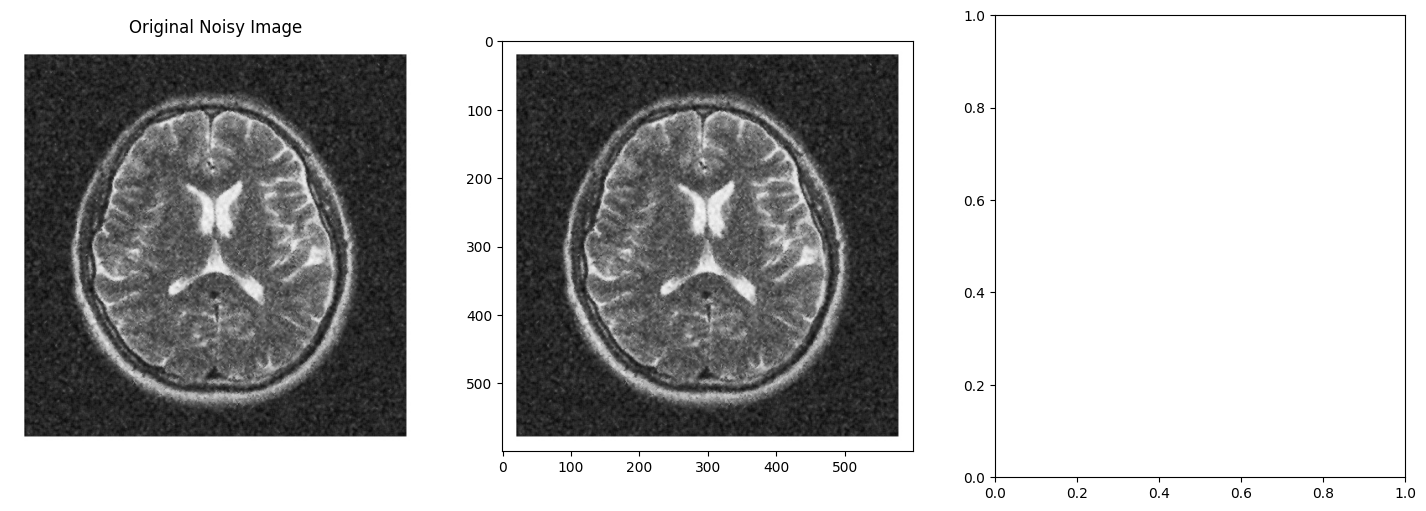

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter, median_filter

# Load the noisy MRI image
img = Image.open('figures/MRI_Highnoise.jpg').convert('L')  # Convert to grayscale
img_array = np.array(img, dtype=float)

# Implement both different filters
    # Hint: Try different parameter values to optimize each filter

sigma = .25                 # TODO: choose sigma
kernel_size = 9            # TODO: choose median size (odd integer)

# 1. Gaussian filter (adjust sigma)
img_gaussian = gaussian_filter(img_array, sigma=sigma)  # TODO: Optimize sigma

# 2. Median filter (adjust size)
img_median = median_filter(img_array, size=kernel_size)  # TODO: Optimize size

# Calculate PSNR for each filtered image
def calculate_psnr(original, filtered):
    """
    Calculate Peak Signal-to-Noise Ratio
    PSNR = 10 * log10(MAX^2 / MSE)
    where MSE is the mean squared error
    """
    # Implement PSNR calculation
        # Hint: For images, MAX is typically 255 for 8-bit images
    mse = None        # TODO
    max_pixel = 255  # TODO
    psnr = None       # TODO
    return psnr

# Calculate PSNR for a reference (you'll need to think about what reference to use)
# For demonstration, we'll calculate PSNR relative to the original noisy image
# In practice, you'd want a ground truth clean image

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_array, cmap='gray')
axes[0].set_title('Original Noisy Image')
axes[0].axis('off')

axes[1].imshow(img_gaussian, cmap='gray')
axes[1].set_title(f'Gaussian Filter\nPSNR: {calculate_psnr(img_array, img_gaussian):.2f} dB')
axes[1].axis('off')

axes[2].imshow(img_median, cmap='gray')
axes[2].set_title(f'Median Filter\nPSNR: {calculate_psnr(img_array, img_median):.2f} dB')
axes[2].axis('off')

plt.tight_layout()
plt.show()

Your Analysis:

- a) Which filter did you choose and why?

### 4.2 Detective Quantum Efficiency (DQE)

**DQE** measures how efficiently an imaging system uses the incoming radiation to produce image information.

**Definition:**
$$DQE = \frac{SNR_{out}^2}{SNR_{in}^2}$$

Where:
- $SNR_{out}$ = signal-to-noise ratio in the output image
- $SNR_{in}$ = signal-to-noise ratio in the input radiation

**Key Concepts:**
- DQE ranges from 0 to 1 (or 0% to 100%)
- **Perfect detector:** DQE = 1 (no noise added by detector)
- **Real detectors:** DQE < 1 (detector adds noise)
- Higher DQE = better detector (more efficient use of radiation)

**Practical Implications:**
- High DQE detector → need less radiation dose for same image quality
- DQE depends on spatial frequency (usually decreases at high frequencies)
- DQE depends on exposure level (often highest at moderate exposures)

**Example:**
- Film/screen: DQE ≈ 0.3-0.4 (30-40%)
- Digital radiography (DR): DQE ≈ 0.6-0.7 (60-70%)
- DR systems allow lower dose for same image quality

### **Question 7**

Two X-ray detector systems are being compared:

- **System A (Film/Screen):** DQE = 0.35, cost = $10,000
- **System B (Digital DR):** DQE = 0.70, cost = $50,000

Both systems receive the same input radiation with $SNR_{in} = 100$.

- a) Calculate the output SNR for each system.

- b) If you want to achieve the same output SNR with System A as System B naturally produces, by what factor would you need to increase the radiation dose to System A?

- c) In a high-volume clinical setting performing 100 chest X-rays per day, discuss whether the higher cost of System B is justified. Consider patient dose, image quality, and long-term patient safety.

In [ ]:
# a)

---

## **<u>Part 5: Quantum Noise & Dose Analysis</u>**

### **Coding Exercise 2**

In this exercise, simulate the effect of photon counting statistics on image quality. You will:
- Generate a simple "phantom" image
- Add Poisson noise at different dose levels
- Calculate SNR as a function of photon count
- Verify the theoretical relationship: $SNR = \sqrt{N}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple phantom (uniform square in background)
phantom = np.zeros((100, 100))
phantom[30:70, 30:70] = 1.0  # Square with intensity 1.0

# Define different photon dose levels (mean photons per pixel)
dose_levels = [10, 50, 100, 500, 1000]
snr_measured = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, N_photons in enumerate(dose_levels):
    # Generate Poisson noise
        # Hint: Scale phantom by N_photons, apply Poisson noise, then normalize back
    noisy_phantom = None        # TODO

    # Calculate SNR in the central square region
    signal_region = noisy_phantom[30:70, 30:70]
    background_region = noisy_phantom[0:20, 0:20]

    signal_mean = None        # TODO
    background_mean =  None        # TODO
    noise_std = None        # TODO

    snr = None        # TODO
    snr_measured.append(snr)

    # Display noisy phantom
    axes[idx].imshow(noisy_phantom, cmap='gray', vmin=0, vmax=1.2)
    axes[idx].set_title(f'N = {N_photons}\nSNR = {snr:.2f}')
    axes[idx].axis('off')

# Plot SNR vs. N (log-log scale)
axes[5].loglog(dose_levels, snr_measured, 'bo-', label='Measured SNR')

# Plot theoretical SNR = sqrt(N) for comparison
theoretical_snr = None        # TODO
axes[5].loglog(dose_levels, theoretical_snr, 'r--', label='Theory: sqrt(N)')
axes[5].set_xlabel('Photon Count (N)')
axes[5].set_ylabel('SNR')
axes[5].set_title('SNR vs. Photon Count')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDose levels and corresponding SNR:")
for N, snr in zip(dose_levels, snr_measured):
    print(f"N = {N:4d} photons: SNR = {snr:.2f} (Theory: {np.sqrt(N):.2f})")

Your Analysis:

- a) Do your measurements agree with the theoretical prediction? If there are differences, what might explain them?

### **Coding Exercise 3**

You're tasked with determining the minimum radiation dose needed for three different clinical scenarios:

1. **Routine chest X-ray** - Need to detect 5 mm nodules (require SNR ≥ 5)
2. **Diagnostic CT** - Need to detect 2 mm lesions (require SNR ≥ 8)
3. **High-risk screening** - Need to detect 1 mm microcalcifications (require SNR ≥ 10)

Given that your baseline protocol delivers N₀ = 1000 photons and achieves SNR₀ = 10 for a 5 mm object:

**Calculate:**
- a) Required photon count for each scenario

- b) Relative dose compared to baseline

In [ ]:
# Baseline values
N0 = 1000  # photons
SNR0 = 10  # for 5 mm object

# Calculate required photon counts for each scenario
    # Hint: Use SNR = sqrt(N) and scale appropriately

scenarios = [
    {'name': 'Routine Chest X-ray', 'size_mm': 5, 'required_snr': 5},
    {'name': 'Diagnostic CT', 'size_mm': 2, 'required_snr': 8},
    {'name': 'High-risk Screening', 'size_mm': 1, 'required_snr': 10}
]

print("Dose Optimization Results:")
print("=" * 70)

for scenario in scenarios:
    # Calculate required N and relative dose
    # Consider both SNR requirements and object size

    required_N = None        # TODO
    relative_dose =  None        # TODO

    print(f"\n{scenario['name']}:")
    print(f"  Object size: {scenario['size_mm']} mm")
    print(f"  Required SNR: {scenario['required_snr']}")
    print(f"  Required photons: {required_N:.0f}")
    print(f"  Relative dose: {relative_dose:.2f}x baseline")

### **Coding Exercise 4**

Create a 2D analysis showing how image quality metrics vary with both radiation dose and detector pixel size.

You will create a heatmap showing the "detectability index" (combining SNR and resolution) as a function of:
- X-axis: Radiation dose (relative to baseline)
- Y-axis: Detector pixel size

This helps visualize the complex trade-offs in imaging system design.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameter ranges
dose_range = np.logspace(-1, 1, 20)  # 0.1x to 10x baseline dose
pixel_size_range = np.linspace(0.1, 2.0, 20)  # 0.1 to 2.0 mm pixels

# Target object size (mm)
target_size = 0.5  # mm

# Calculate detectability index for each combination
# Detectability ∝ SNR × (resolution_factor)
# where resolution_factor decreases as pixel_size approaches target_size

detectability = None        # TODO

for i, pixel_size in enumerate(pixel_size_range):
    for j, dose in enumerate(dose_range):
        # Calculate detectability
        # SNR component from dose
        snr_component = None        # TODO

        # Resolution component (decreases as pixel size increases)
        # Simple model: can't detect objects smaller than ~2× pixel size
        if pixel_size < target_size / 2:
            resolution_component = 1.0
        else:
            resolution_component = None        # TODO

        detectability[i, j] = snr_component * resolution_component

# Create heatmap
plt.figure(figsize=(12, 8))
plt.imshow(detectability, aspect='auto', origin='lower', cmap='viridis',
           extent=[dose_range[0], dose_range[-1], pixel_size_range[0], pixel_size_range[-1]])
plt.colorbar(label='Detectability Index')
plt.xlabel('Relative Dose', fontsize=12)
plt.ylabel('Pixel Size (mm)', fontsize=12)
plt.title(f'Image Quality Trade-offs\n(Target object size: {target_size} mm)', fontsize=14)
plt.xscale('log')

# Add contour lines
contours = plt.contour(dose_range, pixel_size_range, detectability,
                       levels=5, colors='white', alpha=0.5, linewidths=1)
plt.clabel(contours, inline=True, fontsize=8)

# Mark some interesting operating points
plt.plot([1.0], [0.5], 'r*', markersize=15, label='Baseline')
plt.legend(fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Your Analysis:

Based on the heatmap:

- a) What's the optimal operating point for detecting 0.5 mm objects?

- b) If you had to reduce dose by 50%, how should you adjust pixel size to maintain detectability?

- c) What does this tell you about the practical limits of low-dose imaging?

---

## **<u>Part 6: Comprehensive Design Challenge</u>**

You are designing an imaging protocol for lung cancer screening. The goal is to detect 3 mm nodules in the lung parenchyma.

**System constraints:**
- Maximum allowable dose: 3 mSv (effective dose)
- Available detector pixel sizes: 0.5 mm, 1.0 mm, 1.5 mm
- Required detection SNR: 6 (based on Rose criterion with safety factor)

### **Question 8**

- a) Choose a detector pixel size and justify your choice based on the spatial resolution requirements for detecting 3 mm nodules.

- b) Calculate the minimum photon count needed to achieve SNR = 6, assuming baseline noise characteristics.

- c) If Compton scatter contributes 40% of detected photons, how does this affect your SNR calculation? Would you use an anti-scatter grid?

- d) Estimate whether your protocol meets the 3 mSv dose constraint. If not, what compromises would you make and why?

---
## **<u>Submission Requirements</u>**

**You must submit TWO files to D2L:**

1. **Jupyter Notebook** (`.ipynb`): Your completed notebook with all code, outputs, and written analysis. All cells must be executed in order.

2. **PDF Export** (`.pdf`): Export your notebook to PDF (File → Export as PDF, or print to PDF). Verify all figures and equations render correctly.

**Important:** All answers must be completed directly in this Jupyter notebook.

**File naming convention:** `LastName_FirstName_Deliverable1.ipynb` and `.pdf`

**Due:** Monday, February 9, 2026 at 11:59 PM

---

## Submission Summary

| Section | Questions/Analysis Due |
|---------|------------------------|
| **Part 1: Radiation Physics** | Q1 (a,b), Q2 (a,b,c) |
| **Part 2: Photon Interactions** | Q3 (a,b,c,d), Q4 (a,b,c) |
| **Part 3: Spatial Resolution** | Q5 (a,b,c), Q6 (a,b,c) |
| **Part 4: Noise & Image Quality** | Coding Exercise 1 + Analysis, Q7 (a,b,c) |
| **Part 5: Quantum Noise & Dose Analysis** | Coding Exercise 2 + Analysis, Coding Exercise 3, Coding Exercise 4 + Analysis |
| **Part 6: Comprehensive Design Challenge** | Q8 (a,b,c,d) |